In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from scipy import stats 
from scipy.stats import norm

import missingno as msno 
plt.style.use('seaborn') 

import warnings 
warnings.filterwarnings("ignore") 

mpl.rcParams['axes.unicode_minus'] = False 

%matplotlib inline
from pycaret.regression import *

In [2]:
# title : 영화의 제목
# distributor : 배급사
# genre : 장르
# release_time : 개봉일
# time : 상영시간(분)
# screening_rat : 상영등급
# director : 감독이름
# dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
# dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
# num_staff : 스텝수
# num_actor : 주연배우수
# box_off_num : 관객수

In [3]:
df_train=pd.read_csv('movies_train.csv', parse_dates=['release_time'], index_col='Id')
df_test=pd.read_csv('movies_test.csv', parse_dates=['release_time'], index_col='Id')
submission=pd.read_csv('movies_submission.csv', index_col='Id')
data = df_train
print(df_train.shape, df_test.shape, submission.shape)

ValueError: Index Id invalid

In [ ]:
list(df_train)

['title',
 'distributor',
 'genre',
 'release_time',
 'time',
 'screening_rat',
 'director',
 'dir_prev_bfnum',
 'dir_prev_num',
 'num_staff',
 'num_actor',
 'box_off_num']

<AxesSubplot:>

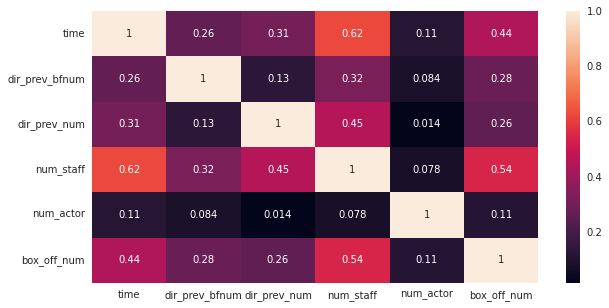

In [ ]:
corr = df_train.corr()
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(10,5)
sns.heatmap(corr, annot=True, ax=ax1)

In [ ]:
# title : 영화의 제목
# distributor : 배급사
# genre : 장르
# release_time : 개봉일
# time : 상영시간(분)
# screening_rat : 상영등급
# director : 감독이름
# dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
# dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
# num_staff : 스텝수
# num_actor : 주연배우수
# box_off_num : 관객수

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           600 non-null    object        
 1   distributor     600 non-null    object        
 2   genre           600 non-null    object        
 3   release_time    600 non-null    datetime64[ns]
 4   time            600 non-null    int64         
 5   screening_rat   600 non-null    object        
 6   director        600 non-null    object        
 7   dir_prev_bfnum  270 non-null    float64       
 8   dir_prev_num    600 non-null    int64         
 9   num_staff       600 non-null    int64         
 10  num_actor       600 non-null    int64         
 11  box_off_num     600 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 56.4+ KB


In [ ]:
df_train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
numerical_feats = df_train.dtypes[df_train.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = df_train.dtypes[df_train.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  7
Number of Categorical features:  5


In [ ]:
print(df_train[numerical_feats].columns)
print("*"*80)
print(df_train[categorical_feats].columns)

Index(['release_time', 'time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff',
       'num_actor', 'box_off_num'],
      dtype='object')
********************************************************************************
Index(['title', 'distributor', 'genre', 'screening_rat', 'director'], dtype='object')


<AxesSubplot:>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


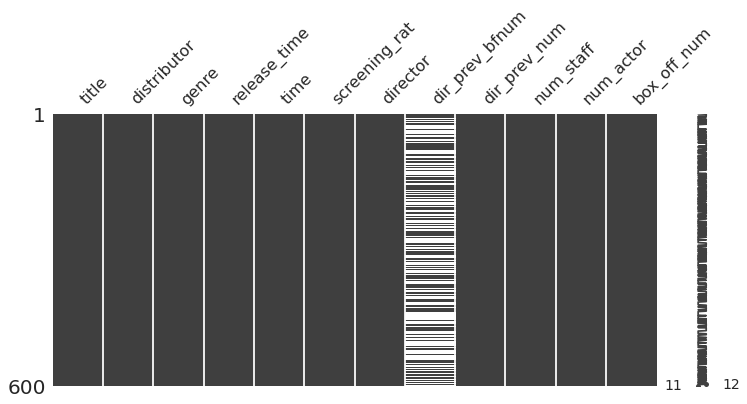

In [ ]:
msno.matrix(df_train, figsize=(12,5)) 
#missingno의 matrix를 이용하여 시각화(결측값 dir_prev_num)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


Skewness: 4.332118
Kurtosis: 21.945819


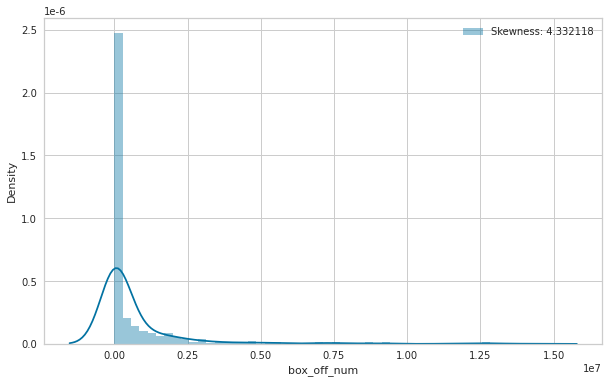

In [ ]:
f, ax = plt.subplots(1, 1, figsize = (10,6))
g = sns.distplot(df_train["box_off_num"], color = "b", label="Skewness: {:2f}".format(df_train["box_off_num"].skew()), ax=ax) 
g = g.legend(loc = "best") 

print("Skewness: %f" % df_train["box_off_num"].skew()) 
print("Kurtosis: %f" % df_train["box_off_num"].kurt())

# 타겟변수인 count의 Skewness와 Kurtosis (첨도&왜도)를 확인
# box_off_num대부분의 데이터가 0에 몰려있는 모습을 확인.

In [ ]:
# 5. Iteration 3: Setup with Advance Preprocessing

reg1 = setup(df_train, target = 'box_off_num', session_id = 123, 
             normalize = True, normalize_method = 'zscore',
             numeric_features=['time', 'dir_prev_bfnum', 'dir_prev_num', 'num_staff','num_actor'],
             categorical_features= ['title', 'distributor', 'genre', 'screening_rat', 'director'],
             polynomial_features = True, trigonometry_features = True, remove_outliers = True, outliers_threshold = 0.01,
             silent = True #silent is set to True for unattended run during kernel execution
             )

,Description,Value
0,session_id,123
1,Target,box_off_num
2,Original Data,"(600, 12)"
3,Missing Values,True
4,Numeric Features,5
5,Categorical Features,5
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(414, 545)"


In [ ]:
compare_models(sort='rmse')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,572842.4016,2263985228150.0312,1374096.7683,0.1990,2.3247,44.7800,0.0120
en,Elastic Net,689292.3420,2314511482795.7520,1398385.7600,0.1837,3.7892,751.4983,0.0190
et,Extra Trees Regressor,516941.3335,2455854417118.5103,1410632.2164,0.2250,1.9838,12.9779,0.1990
lightgbm,Light Gradient Boosting Machine,679634.6169,2253333640410.8438,1420503.8138,0.0940,3.3384,186.2924,0.0130
rf,Random Forest Regressor,563738.7996,2414413078216.8096,1433959.1666,0.1561,2.1138,35.4550,0.1680
huber,Huber Regressor,548926.9334,2576065236145.7407,1449885.7325,0.1836,2.9761,370.2481,0.0220
gbr,Gradient Boosting Regressor,608428.6540,2475977414300.1138,1458576.1328,0.1288,2.9440,164.0321,0.0560
omp,Orthogonal Matching Pursuit,566182.5437,2809187541494.7588,1504789.1236,0.1215,2.4842,77.8247,0.1930
llar,Lasso Least Angle Regression,608953.4829,2735961210390.8799,1530134.6839,-0.0182,3.0272,301.7185,0.2340
lasso,Lasso Regression,919993.4789,2647714331204.0947,1535839.0682,-0.1099,4.3132,2822.6136,0.1920


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
knn = create_model('knn', verbose = False)
en = create_model('en', verbose = False)
et = create_model('et', verbose = False)

/home/yjjo/venv_AutoML_pycaret/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1130694180864.0, tolerance: 122186555392.0
  model = cd_fast.enet_coordinate_descent(


In [ ]:
tuned_knn = tune_model(knn, optimize='RMSE', n_iter=100)
tuned_en = tune_model(en, optimize='RMSE', n_iter=100)
tuned_et = tune_model(et, optimize='RMSE', n_iter=100)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,624403.1450,1561585049142.8135,1249633.9661,0.3507,3.7073,111.9354
1,429351.8125,923384778312.8337,960929.1224,-0.4497,3.0395,30.9015
2,671741.6701,1439943635505.9136,1199976.5146,-0.0186,3.3005,1066.8723
3,411970.3019,712138307603.4663,843882.8755,0.4915,3.0241,40.6598
4,418047.2754,758816926809.6509,871100.9854,0.3798,3.6597,161.7282
5,891611.8195,4189451977631.8130,2046815.0814,0.3055,3.5019,450.4482
6,329953.1724,294945259164.7110,543088.6292,0.5102,3.5079,178.2775
7,895454.1989,6717807148214.5703,2591873.2894,0.2680,3.6204,852.2572
8,705575.5464,3143309089562.7402,1772937.9824,0.2942,2.9453,40.5478


In [ ]:
blend_all = blend_models(estimator_list = [tuned_knn, tuned_en, tuned_et])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,566990.7981,1239906082644.8425,1113510.7016,0.4845,3.6307,101.5793
1,409361.0848,847832165377.2166,920778.0218,-0.3311,3.5224,58.8155
2,616383.0085,1251370831340.5789,1118646.8752,0.1148,3.0873,69.7973
3,436095.2518,685021580446.4312,827660.3050,0.5108,3.2923,72.6430
4,384205.0257,700042115362.4016,836685.1949,0.4278,3.6043,158.2349
5,924614.5190,4554039811229.8037,2134019.6370,0.2451,3.4965,233.8286
6,328181.6437,289157868133.2849,537734.0124,0.5198,3.5470,158.0704
7,885676.3056,6725359925809.4395,2593329.8914,0.2672,3.7159,967.1825
8,699000.6843,3120857509931.0830,1766594.8913,0.2992,3.1130,48.2394


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


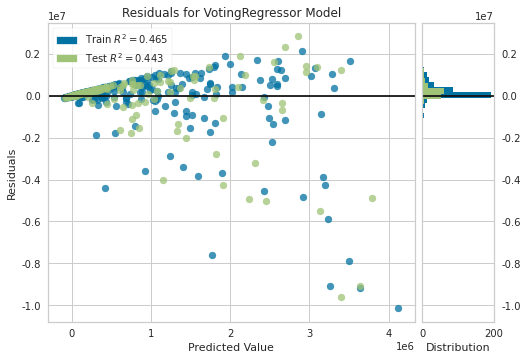

In [ ]:
plot_model(blend_all)

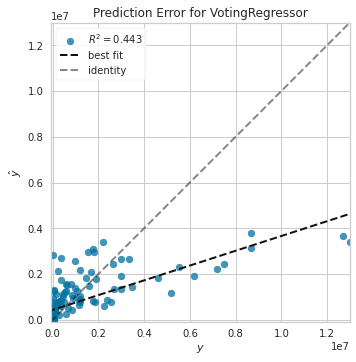

In [ ]:
plot_model(blend_all, plot = 'error')

In [ ]:
predict_model(blend_all)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,660860.6493,2194589275029.3225,1481414.6196,0.4434,3.4297,117.9625


,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,num_staff_Power2,time_Power2,title_18 우리들의 성장 느와르,title_26년,title_48미터,...,release_time_month_7,release_time_month_8,release_time_month_9,release_time_weekday_0,release_time_weekday_2,release_time_weekday_3,release_time_is_month_end_0,release_time_is_month_start_0,box_off_num,Label
0,0.211835,-7.614726e-01,1.851527,0.658785,-0.702600,0.193520,0.119901,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,346483,6.098547e+05
1,-1.567788,-8.329563e-01,0.987618,-0.244692,-0.702600,-0.425908,-1.366039,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,112,-3.713544e+03
2,0.767967,-8.214138e-01,1.851527,0.807302,-0.310081,0.343427,0.695070,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1755181,8.096491e+05
3,-0.010618,1.113420e-09,-0.740198,0.559774,0.082438,0.101124,-0.095391,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,60944,1.295331e+06
4,0.823580,1.444980e-01,0.987618,1.098147,0.082438,0.676322,0.755489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1166025,8.323642e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,0.267448,1.113420e-09,-0.740198,-0.900641,0.082438,-0.560824,0.175044,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,29478,1.895586e+05
177,1.101646,-8.332681e-01,0.123710,0.714479,-0.702600,0.248144,1.065500,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3199,9.513812e+05
178,1.324098,5.797572e-02,1.851527,2.471927,0.082438,2.952505,1.323006,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1546132,2.961931e+06
179,-0.900429,1.113420e-09,-0.740198,-0.906830,-1.095120,-0.560836,-0.872133,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,6226,-2.025888e+04


In [ ]:
final_blender = finalize_model(blend_all)

In [ ]:
predictions = predict_model(final_blender, data = df_test)
predictions.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,Label
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3,2.028305e+06
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3,1.483805e+06
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7,1.973459e+06
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2,1.725343e+06
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1,1.326275e+06


In [ ]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


In [ ]:
submission['box_off_num'] = predictions['Label']
print(submission[:10])
submission.to_csv('using_pycaret_moviescore.csv', index=False, encoding = 'utf-8-sig')

         title   box_off_num
0       용서는 없다  2.028305e+06
1  아빠가 여자를 좋아해  1.483805e+06
2          하모니  1.973459e+06
3          의형제  1.725343e+06
4        평행 이론  1.326275e+06
5       회오리 바람  2.224749e+05
6       경계도시 2  1.369428e+05
7       이웃집 남자  1.418093e+05
8  아마존의 눈물 극장판  6.888856e+04
9      반가운 살인자  6.183441e+05
